In [67]:
#import library
import pandas as pd
from scipy import stats
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats


In [68]:
#data import
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [69]:
#bigger picture
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [70]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [71]:
df.tail(
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [72]:
#how to find unique values
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [73]:
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [74]:
df['fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [75]:
df['survived'].unique()

array([0, 1])

In [76]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [77]:
df['pclass'].unique()

array([3, 1, 2])

In [78]:

df['who'].nunique()

3

In [79]:
df['fare'].nunique()

248

In [80]:
df['age'].nunique()

88

In [81]:
df['survived'].nunique()

2

In [82]:
df['sibsp'].nunique()

7

In [83]:
df['parch'].nunique()

7

In [84]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='age', ylabel='Count'>

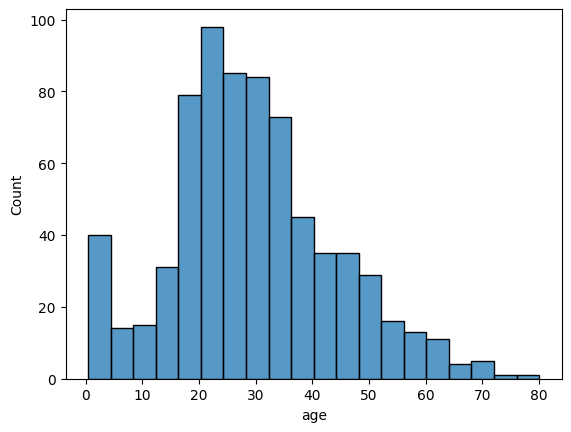

In [85]:
sns.histplot(df, x= "age")

<Axes: xlabel='age', ylabel='Count'>

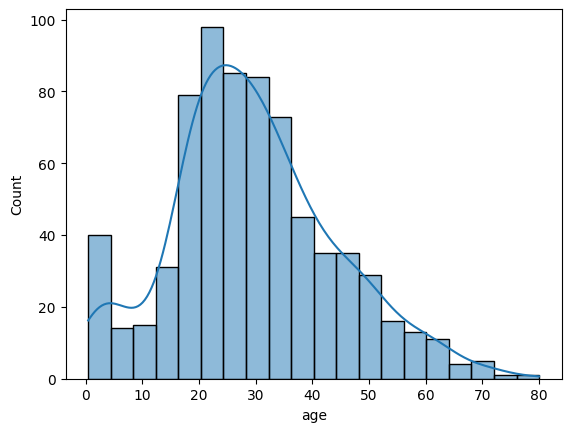

In [86]:
sns.histplot(df, x=df['age'], kde=1)

<Axes: xlabel='age', ylabel='Count'>

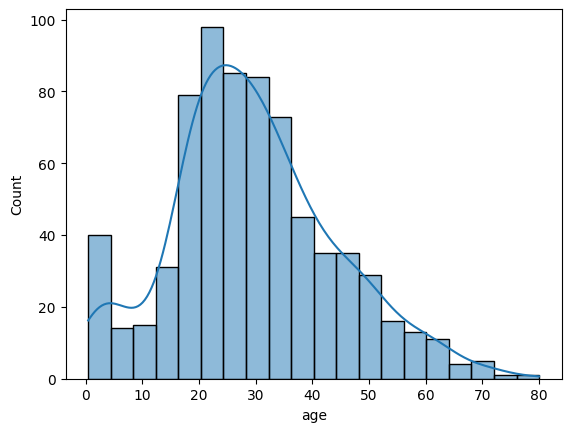

In [87]:
sns.histplot(df, x=df['age'], kde=1)

In [88]:
#chaeck normality
stats.shapiro('age')

C:\Users\HKT\AppData\Local\Temp\ipykernel_15552\3459136909.py:2: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.



ShapiroResult(statistic=np.str_('nan'), pvalue=np.str_('nan'))

In [ ]:
stats.shapiro(df['age'])

ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [93]:
result = stats.shapiro(df['age'])

In [94]:
if result.pvalue > 0.05:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")

The data is not normally distributed.


In [90]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=np.float64(0.5218913010396559), pvalue=np.float64(1.0840444395829658e-43))

<Axes: xlabel='fare', ylabel='Count'>

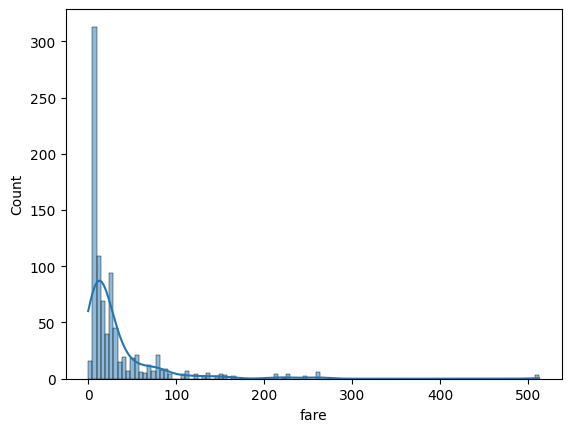

In [91]:
sns.histplot(df, x=df['fare'], kde=1)

In [92]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=np.float64(0.5218913010396559), pvalue=np.float64(1.0840444395829658e-43))

In [95]:
result_fare = stats.shapiro(df['fare'])

In [97]:
if result_fare.pvalue > 0.05:
    print("data is normally distributed")
else:
    print("data is not normally distributed")

data is not normally distributed


<Axes: xlabel='class', ylabel='fare'>

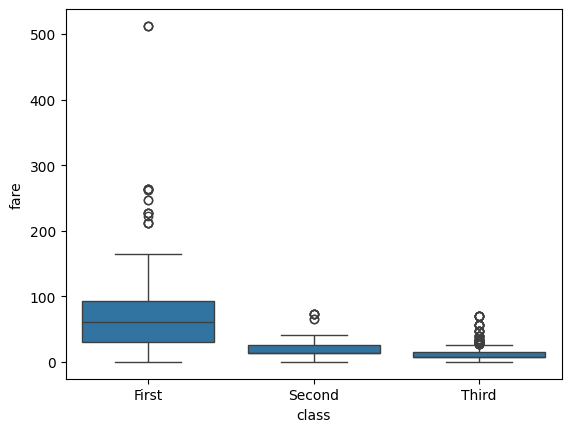

In [98]:
sns.boxplot(df, x="class", y="fare")

In [99]:
stats.shapiro(df["fare"])

ShapiroResult(statistic=np.float64(0.5218913010396559), pvalue=np.float64(1.0840444395829658e-43))

In [104]:
df_first = df[df['class'] == 'First']
stats.shapiro(df_first['fare'])

ShapiroResult(statistic=np.float64(0.7184011166151456), pvalue=np.float64(7.556208132385032e-19))

In [105]:
df_second = df[df['class'] == 'Second']
stats.shapiro(df_second['fare'])

ShapiroResult(statistic=np.float64(0.7785055068881875), pvalue=np.float64(2.113441101754537e-15))

In [106]:
df_third = df[df['class'] == 'Third']
stats.shapiro(df_third['fare'])

ShapiroResult(statistic=np.float64(0.6183852077353742), pvalue=np.float64(1.5994737003198227e-31))

In [107]:
# find missing value
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [108]:
# how to find outliers
#subset
df_first = df[df['class'] == 'First']
#IQR method
Q1 = df_first['fare'].quantile(0.25)
Q3 = df_first['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR
#lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [109]:
df_outliers_removed = df_first[(df_first['fare'] > lower_bound) & (df_first['fare'] < upper_bound)]
df_outliers_removed

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [111]:
df_outliers_removed.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


<Axes: xlabel='fare', ylabel='Count'>

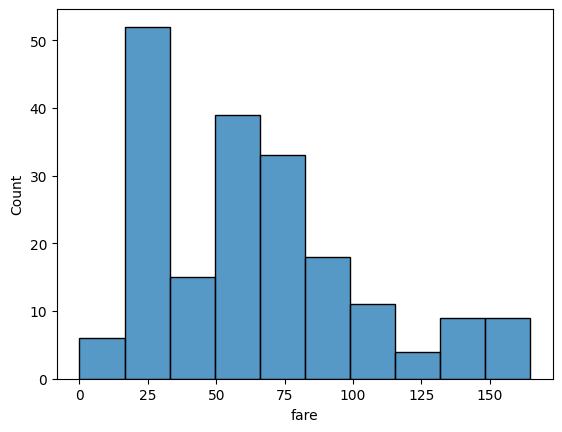

In [112]:
sns.histplot(df_outliers_removed['fare'])

<Axes: xlabel='fare', ylabel='Count'>

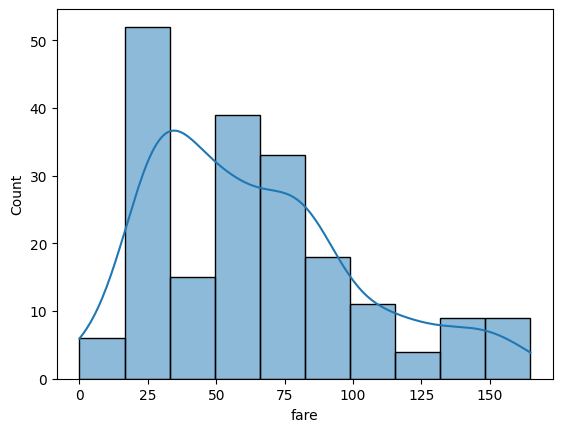

In [113]:
sns.histplot(df_outliers_removed['fare'], kde=1)

In [114]:
stats.shapiro(df_outliers_removed['fare'])

ShapiroResult(statistic=np.float64(0.9243669055626075), pvalue=np.float64(1.6046327508760568e-08))

In [115]:
# how to find outliers
#subset
df_second = df[df['class'] == 'Second']
#IQR method
Q1 = df_second['fare'].quantile(0.25)
Q3 = df_second['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR
#lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [116]:
df_outliers_removed_seond = df_second[(df_second['fare'] > lower_bound) & (df_second['fare'] < upper_bound)]
df_outliers_removed_seond

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
20,0,2,male,35.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,1,2,female,27.0,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True


In [121]:
df_outliers_removed_seond.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
20,0,2,male,35.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True


<Axes: xlabel='fare', ylabel='Count'>

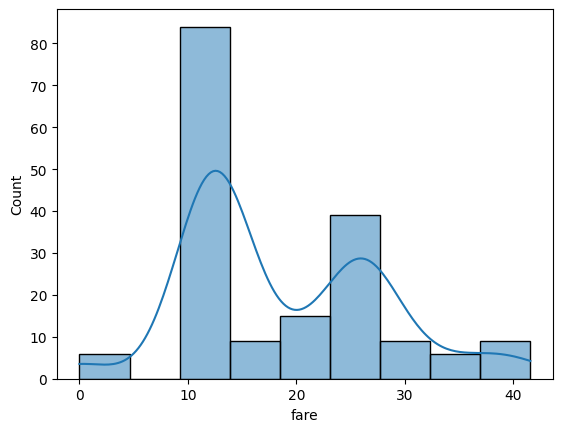

In [122]:
sns.histplot(df_outliers_removed_seond['fare'], kde=1)

In [123]:
stats.shapiro(df_outliers_removed_seond['fare'])

ShapiroResult(statistic=np.float64(0.9008325469951028), pvalue=np.float64(1.6276233394349399e-09))

In [ ]:
#same procees apply third class


In [125]:
#subset
#data import 
df =sns.load_dataset("titanic")
df['fare'] = np.log(df['fare'])
df.head()

c:\Users\HKT\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


In [126]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(1.0))

In [127]:
finaal_result = stats.shapiro(df['fare'])

In [128]:
if finaal_result.pvalue >0.05:
    print("data is normaly distributed")
else:
    print("data is not normaly distributed")

data is normaly distributed


<Axes: xlabel='fare', ylabel='Count'>

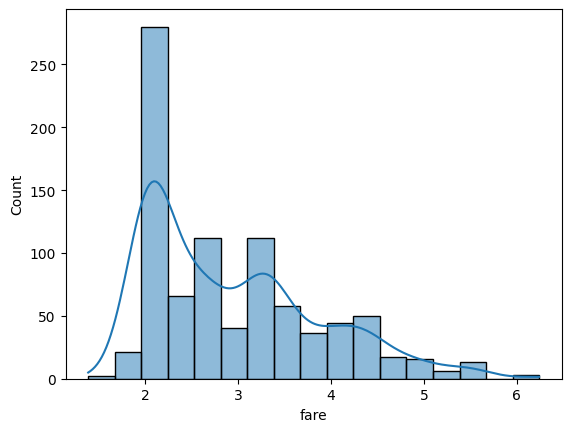

In [129]:
sns.histplot(df['fare'], kde=1)

In [ ]:
#why statistics nan and p value is 1.0 assignment?